In [135]:
from faker import Faker
import random
import pandas as pd
from faker_credit_score import CreditScore



fake = Faker()
fake.add_provider(CreditScore)

random.seed(42)


def generate_succesful():
    transaction_time = fake.date_time_this_decade()
    amount = round(random.uniform(100,100000),2)
    location = fake.country()
    if amount < 750:
        customer_behvior = "Suspicious"
    else:
        customer_behvior = random.choice(["Normal", "Suspicious"])
    customer_name = fake.company()
    email = fake.email()
    phone_number = fake.phone_number()
    Payment_type = random.choice(["Visa", "MasterCard","BankTransfer"])
    card_number = fake.credit_card_number()

    successdata = {
        "TransactionTime": transaction_time,
        "Amount": amount,
        "Location": location,
        "CustomerBehavior": customer_behvior,
        "Success": True,
        'CustomerName': customer_name,
        'Email': email,
        'PhoneNumber': phone_number,
        'PaymentType': Payment_type,
        'AccountNumber': card_number,
        "CreditScore":random.randint(600,850)
    }
    return successdata


def generate_unsuccesful():
    transaction_time = fake.date_time_this_decade()
    amount = round(random.uniform(100,1000),2)
    location = fake.country()
    customer_behvior = random.choice(["Normal", "Suspicious"])
    customer_name = fake.company()
    email = fake.email()
    phone_number = fake.phone_number()
    Payment_type = random.choice(["Visa", "MasterCard","BankTransfer"])
    card_number = fake.credit_card_number()

    nosuccessdata = {
        "TransactionTime": transaction_time,
        "Amount": amount,
        "Location": location,
        "CustomerBehavior": customer_behvior,
        "Success": False,
        'CustomerName': customer_name,
        'Email': email,
        'PhoneNumber': phone_number,
        'PaymentType': Payment_type,
        'AccountNumber': card_number,
        "CreditScore":random.randint(550,800)
    }
    return nosuccessdata

succesful_transaction = [generate_succesful() for i in range(3800) ]
unsuccesful_transaction = [generate_unsuccesful() for i in range(300) ]
transactions= succesful_transaction+unsuccesful_transaction
random.shuffle(transactions)

df = pd.DataFrame(transactions)

df.to_csv("fake_transaction.csv", index=False)

df.head()


,TransactionTime,Amount,Location,CustomerBehavior,Success,CustomerName,Email,PhoneNumber,PaymentType,AccountNumber,CreditScore
0,2023-09-15 03:13:15,69826.95,Gabon,Suspicious,True,Conway-Hubbard,hayley19@example.org,001-520-957-8547x37788,Visa,502059090899,736
1,2021-02-14 04:20:10,4055.30,India,Suspicious,True,Clark-Owens,johnnyleon@example.net,772-651-8197x960,MasterCard,4077636475842267,704
2,2020-02-11 13:59:13,52988.59,Lesotho,Suspicious,True,Smith PLC,plee@example.com,801.342.2748,MasterCard,4952956028908771812,700
3,2021-04-28 21:38:14,2944.97,Afghanistan,Normal,True,Brown Group,james67@example.net,(827)526-0375x3274,MasterCard,639087036229,607
4,2021-01-12 14:09:20,43165.39,Macao,Normal,True,"Robles, Thomas and Fuentes",oodom@example.net,4197858466,BankTransfer,6011744079066806,678


In [136]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ["Location", "CustomerBehavior", "PaymentType", "Success"]

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

del df["CustomerName"]
del df["Email"]
del df["PhoneNumber"]
del df["AccountNumber"]
del df["TransactionTime"]
df.dropna()

df.head()

,Amount,Location,CustomerBehavior,Success,PaymentType,CreditScore
0,69826.95,76,1,1,2,736
1,4055.30,99,1,1,1,704
2,52988.59,120,1,1,1,700
3,2944.97,0,0,1,1,607
4,43165.39,126,0,1,0,678


In [137]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

y = df["Success"] #target variable
dependent_variables = ["Amount","Location","CustomerBehavior","PaymentType","CreditScore"]
x = df[dependent_variables]


x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=324)

model = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0) #dont go more than 10 leaf to prevent overfitting
model.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)

In [138]:
y_predicted = model.predict(x_test)
accuracy = round(accuracy_score(y_test,y_predicted)*100,1)
print(f"Calculated Accuracy Score: {accuracy}%")

print("Classification Report:")
print(classification_report(y_test, y_predicted))

Calculated Accuracy Score: 98.8%
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92        85
           1       1.00      0.99      0.99      1145

    accuracy                           0.99      1230
   macro avg       0.93      0.98      0.96      1230
weighted avg       0.99      0.99      0.99      1230



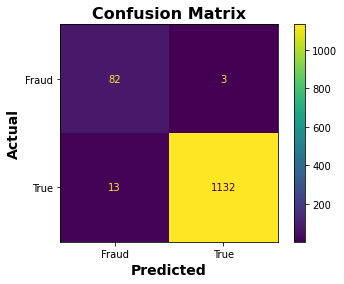

In [139]:
from matplotlib import pyplot as plt

# Calculate the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = ["Fraud", "True"])
cm_display.plot()

plt.title("Confusion Matrix",size=16, weight="bold")
plt.ylabel("Actual", size=14, weight="bold")
plt.xlabel("Predicted", size=14, weight="bold")
plt.show()

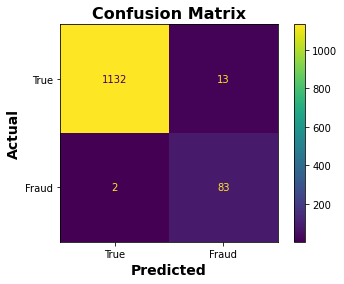

In [140]:
import numpy as np

cm = confusion_matrix(y_test, y_predicted)
rearranged_cm = np.array([[cm[1, 1], cm[1, 0]], [cm[0, 1], cm[0, 0]]])
cm_display = ConfusionMatrixDisplay(confusion_matrix=rearranged_cm, display_labels=["True", "Fraud"])
cm_display.plot()

plt.title("Confusion Matrix", size=16, weight="bold")
plt.ylabel("Actual", size=14, weight="bold")
plt.xlabel("Predicted", size=14, weight="bold")
plt.show()
